In [74]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# display dataset as a Pandas DataFrame

data = pd.read_csv('Resources/COVID_staff_shortages.csv')
data

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,ME,2021/01/23,1,30,8,2,29,8,3.0,38,...,NaN,0,NaN,0,NaN,0,47.0,38,60.0,38
1,SD,2021/01/23,2,60,3,2,60,3,27.0,62,...,NaN,0,NaN,0,NaN,0,36.0,62,83.0,62
2,MD,2021/01/22,2,57,1,2,57,1,31.0,59,...,NaN,0,NaN,0,NaN,0,172.0,59,240.0,59
3,RI,2021/01/22,6,8,1,6,8,1,6.0,14,...,NaN,0,NaN,0,NaN,0,62.0,14,93.0,14
4,ID,2021/01/21,4,40,8,5,39,8,0.0,51,...,NaN,0,NaN,0,NaN,0,82.0,30,230.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,6,58,1,7,57,1,3.0,64,...,NaN,0,NaN,0,NaN,0,8.0,9,18.0,9
54007,NJ,2021/03/09,9,61,8,10,60,8,76.0,77,...,NaN,0,NaN,0,NaN,0,49.0,24,107.0,24
54008,NM,2021/05/19,12,43,1,16,39,1,2.0,55,...,NaN,0,NaN,0,NaN,0,0.0,19,0.0,19
54009,NE,2021/04/15,9,91,1,16,84,1,1.0,100,...,NaN,0,NaN,0,NaN,0,0.0,12,0.0,12


In [76]:
# explore the data

# YOUR CODE HERE

In [77]:
#add columns for year, month, data for additional grouping/analysis 
data['date_for_split'] = data['date']
data[['year', 'month','day']] = data['date_for_split'].str.split('/', 2, expand=True)
data

#make df with select data of interest
select_df = data[['state','date','year','month','day',
                'critical_staffing_shortage_today_yes','critical_staffing_shortage_today_no','critical_staffing_shortage_today_not_reported',
                'inpatient_beds','inpatient_beds_used',
                'previous_day_admission_adult_covid_confirmed',
                'previous_day_admission_pediatric_covid_confirmed',
                'all_pediatric_inpatient_bed_occupied','all_pediatric_inpatient_beds',
                'previous_day_deaths_covid_and_influenza_coverage',]]
select_df

,state,date,year,month,day,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,inpatient_beds,inpatient_beds_used,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,previous_day_deaths_covid_and_influenza_coverage
0,ME,2021/01/23,2021,01,23,1,30,8,3229.0,2231.0,15.0,0.0,174.0,226.0,38
1,SD,2021/01/23,2021,01,23,2,60,3,2868.0,1641.0,8.0,1.0,291.0,387.0,62
2,MD,2021/01/22,2021,01,22,2,57,1,11827.0,9635.0,217.0,0.0,648.0,902.0,59
3,RI,2021/01/22,2021,01,22,6,8,1,2402.0,2445.0,25.0,0.0,635.0,573.0,14
4,ID,2021/01/21,2021,01,21,4,40,8,3694.0,2268.0,32.0,2.0,273.0,704.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,2021,03,29,6,58,1,2938.0,1762.0,8.0,0.0,45.0,86.0,64
54007,NJ,2021/03/09,2021,03,09,9,61,8,21569.0,15395.0,241.0,4.0,365.0,369.0,77
54008,NM,2021/05/19,2021,05,19,12,43,1,4446.0,3181.0,21.0,0.0,36.0,52.0,55
54009,NE,2021/04/15,2021,04,15,9,91,1,4368.0,2958.0,22.0,0.0,14.0,22.0,100


In [78]:
"""Hypotheses
    Null 1: There is no relationshsip between pediatric and adult admittance throughout the year AND 
            they do not have repaltionship to staff shortages
    Altt 1: There is a relationship between adult and pediatric admittance throughout the year AND
            they do have a relationship to shatt shortages
    #line graph by month, by date 
    
    Null 2: there is no linear relationship between hospital staff shortages and adult or pediatric hospital admittance
    Altt 2: there is a linar relationship between shortages and hosital admittance 
    #Scatter plots patient beds % occupancy
    #covid admittentce adult and pediatric->shift previous day
    
    Null 3: There is no significant difference in the staff shortages through the months of the year and pediatric or adult admittance
    Altt 3: There is a significant difference in the staff shortages through the months of the year and pediatric or adult admittance
    
    #high med low of for each month/date compare when there are significant highs or lows for all three. ->categorical data

"""


'Hypotheses\n    Null 1: There is no relationshsip between pediatric and adult admittance throughout the year AND \n            they do not have repaltionship to staff shortages\n    Altt 1: There is a relationship between adult and pediatric admittance throughout the year AND\n            they do have a relationship to shatt shortages\n    \n    Null 2: there is no linear relationship between hospital staff shortages and adult or pediatric hospital admittance\n    Altt 2: there is a linar relationship between shortages and hosital admittance \n    \n    \n    Null 3: There is no significant difference in the staff shortages through the months of the year and pediatric or adult admittance\n    Altt 3: There is a significant difference in the staff shortages through the months of the year and pediatric or adult admittance\n    \n\n'

In [79]:
#group by year and month
#states

month_year_group = select_df.groupby(["year", "month"])
month_year_group_df = month_year_group.sum()

#create new column with sum of reported yes, no, and not reported
month_year_group_df['total_staffing'] = month_year_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
month_year_group_df['percent_shortage_today'] = ((month_year_group_df['critical_staffing_shortage_today_yes'] / month_year_group_df['total_staffing'])*100).round(2)
month_year_group_df['percent_inpatient_occupancy'] = ((month_year_group_df['inpatient_beds_used'] / month_year_group_df['inpatient_beds'])*100).round(2)
month_year_group_df['percent_pediatric_occupancy'] = ((month_year_group_df['all_pediatric_inpatient_bed_occupied'] / month_year_group_df['all_pediatric_inpatient_beds'])*100).round(2)

month_year_group_df

#print to csv
#month_year_group_df.to_csv('month_year_group_df.csv')

critical_staffing_shortage_today_yes  \
year month                                         
2020 01                                       80   
     02                                        0   
     03                                        0   
     04                                       30   
     05                                        6   
     06                                       48   
     07                                    10034   
     08                                    24221   
     09                                    25951   
     10                                    29044   
     11                                    32528   
     12                                    37456   
2021 01                                    31865   
     02                                    22916   
     03                                    21294   
     04                                    19784   
     05                                    19979   
     06                                    18246   
     07                                    19202   
     08                                    23797   
     09                                    29035   
     10                                    30184   
     11                                    28507   
     12                                    31424   
2022 01                                    28320   
     02                                    11382   
     03                                     9509   
     04                                     8706   
     05                                     8642   
     06                                     8218   
     07                                     9203   
     08                                     9206   
     09                                     7896   
     10                                     7708   
     11                                     7104   
     12                                      249   

            critical_staffing_shortage_today_no  \
year month                                        
2020 01                                     220   
     02                                       0   
     03                                       6   
     04                                     257   
     05                                     235   
     06                                     442   
     07                                   39506   
     08                                  107763   
     09                                  123922   
     10                                  144423   
     11                                  138355   
     12                                  138220   
2021 01                                  141469   
     02                                  131354   
     03                                  148516   
     04                                  143240   
     05                                  147207   
     06                                  140994   
     07                                  141201   
     08                                  127523   
     09                                  119585   
     10                                  123554   
     11                                  118919   
     12                                  122245   
2022 01                                  113384   
     02                                   89060   
     03                                   98934   
     04                                   95445   
     05                                   97796   
     06                                   95370   
     07                                  100482   
     08                                   96393   
     09                                   80925   
     10                                   81964   
     11                                   77258   
     12                                    2480   

            critical_staffing_shortage_today_not_reported  inpatient_beds  \
year month         

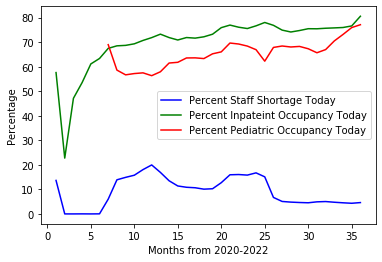

In [91]:

#line chart
#plot percent shortage as a line chart
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#items to plot 
shortage_percent_today = month_year_group_df["percent_shortage_today"]
inpatient_occupancy = month_year_group_df['percent_inpatient_occupancy']
pediatric_occupancy = month_year_group_df['percent_pediatric_occupancy']


percent_shortage_today = plt.plot(months,shortage_percent_today, color="blue", label="Percent Staff Shortage Today")
inpatient_occupancy_today = plt.plot(months,inpatient_occupancy, color="green", label="Percent Inpateint Occupancy Today")
pediatric_occupancy_today = plt.plot(months,pediatric_occupancy, color="red", label="Percent Pediatric Occupancy Today")

# Create a legend for our chart
plt.legend(handles=[percent_shortage_today[0], inpatient_occupancy_today[0], pediatric_occupancy_today[0]], loc="best")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Percentage")
#show the chart
plt.show()

#Adult confirmed covidb
#pediatric confirmed covid 
#Reported patients currently hospitalized in an adult ICU bed who have confirmed COVID-19 in this state

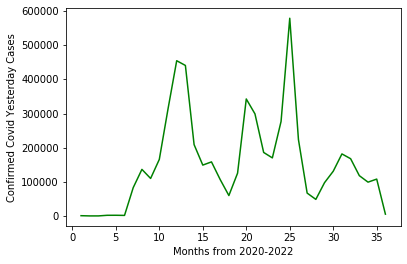

In [99]:
#NEED TO SHIFT
'''ADULT CASES COVID'''
#plot covid admitance thorugh entire time line
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#previous_day_admission_adult_covid_confirmed
adult_confirm = month_year_group_df['previous_day_admission_adult_covid_confirmed']
#previous_day_admission_pediatric_covid_confirmed
#pediatric_confirm = month_year_group_df['previous_day_admission_pediatric_covid_confirmed']

adult_confirm_yeasterday = plt.plot(months,adult_confirm, color="green", label="Adult Confirm Covid Yesterday")
#pediatric_confirm_yeasterday = plt.plot(months,pediatric_confirm, color="red", label="Pediatric Confirm Covid Yesterday")

# Create a legend for our chart
#plt.legend(handles=[adult_confirm_yeasterday[0], pediatric_confirm_yeasterday[0]], loc="best")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Confirmed Covid Yesterday Cases")
#show the chart
plt.show()

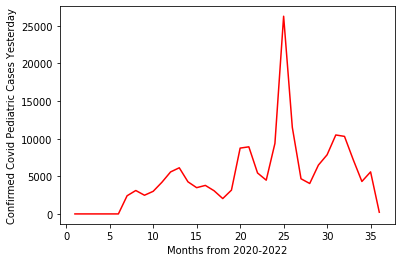

In [100]:
#NEED TO SHIFT
'''Pediatric CASES COVID'''
#plot covid admitance thorugh entire time line
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#previous_day_admission_adult_covid_confirmed
#adult_confirm = month_year_group_df['previous_day_admission_adult_covid_confirmed']
#previous_day_admission_pediatric_covid_confirmed
pediatric_confirm = month_year_group_df['previous_day_admission_pediatric_covid_confirmed']

#adult_confirm_yeasterday = plt.plot(months,adult_confirm, color="green", label="Adult Confirm Covid Yesterday")
pediatric_confirm_yeasterday = plt.plot(months,pediatric_confirm, color="red", label="Pediatric Confirm Covid Yesterday")

# Create a legend for our chart
#plt.legend(handles=[adult_confirm_yeasterday[0], pediatric_confirm_yeasterday[0]], loc="best")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Confirmed Covid Pediatric Cases Yesterday")
#show the chart
plt.show()

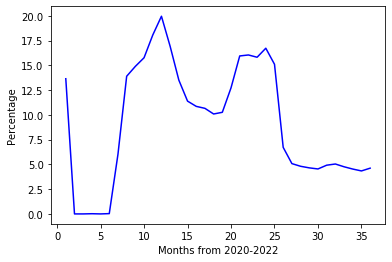

In [101]:
#line chart
#plot percent shortage as a line chart
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#items to plot 
shortage_percent_today = month_year_group_df["percent_shortage_today"]



percent_shortage_today = plt.plot(months,shortage_percent_today, color="blue", label="Percent Staff Shortage Today")
#inpatient_occupancy_today = plt.plot(months,inpatient_occupancy, color="green", label="Percent Inpateint Occupancy Today")
#pediatric_occupancy_today = plt.plot(months,pediatric_occupancy, color="red", label="Percent Pediatric Occupancy Today")

# Create a legend for our chart
#plt.legend(handles=[percent_shortage_today[0], inpatient_occupancy_today[0], pediatric_occupancy_today[0]], loc="best")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Percentage")
#show the chart
plt.show()

In [82]:
scatterplot? Adult and shortage Pediatric and shortages?
Stats on data? mean? categorize to low, meddium, high? sizes of dots in plot? 

SyntaxError: invalid syntax (1943388067.py, line 2)

In [83]:
#
#group by date 


In [84]:
#how many time points taken each year?
select_df['year'].value_counts()

2021    19475
2022    18090
2020    16446
Name: year, dtype: int64

In [92]:
#dataframe for only 2020
select_2020 = select_df.loc[select_df['year'] == '2020', :]
#dataframe for only 2021
select_2021 = select_df.loc[select_df['year'] == '2021',:]
#dataframe for 2022
select_2022 =  select_df.loc[select_df['year'] == '2022',:]

#group by date 2020 
date_2020_group = select_2020.groupby(["date"])
date_2020_group_df = date_2020_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2020_group_df['total_staffing'] = date_2020_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2020_group_df['percent_shortage_today'] = ((date_2020_group_df['critical_staffing_shortage_today_yes'] / date_2020_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2020_group_df['percent_inpatient_occupancy'] = ((date_2020_group_df['inpatient_beds_used'] / date_2020_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2020_group_df['percent_pediatric_occupancy'] = ((date_2020_group_df['all_pediatric_inpatient_bed_occupied'] / date_2020_group_df['all_pediatric_inpatient_beds'])*100).round(2)
date_2020_group_df.to_csv('date_2020_group_df.csv')

#group by date 2021
date_2021_group = select_2021.groupby(["date"])
date_2021_group_df = date_2021_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2021_group_df['total_staffing'] = date_2021_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2021_group_df['percent_shortage_today'] = ((date_2021_group_df['critical_staffing_shortage_today_yes'] / date_2021_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2021_group_df['percent_inpatient_occupancy'] = ((date_2021_group_df['inpatient_beds_used'] / date_2021_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2021_group_df['percent_pediatric_occupancy'] = ((date_2021_group_df['all_pediatric_inpatient_bed_occupied'] / date_2021_group_df['all_pediatric_inpatient_beds'])*100).round(2)
date_2021_group_df.to_csv('date_2021_group_df.csv')

#group by date 2022
date_2022_group = select_2022.groupby(["date"])
date_2022_group_df = date_2022_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2022_group_df['total_staffing'] = date_2022_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2022_group_df['percent_shortage_today'] = ((date_2022_group_df['critical_staffing_shortage_today_yes'] / date_2022_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2022_group_df['percent_inpatient_occupancy'] = ((date_2022_group_df['inpatient_beds_used'] / date_2022_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2022_group_df['percent_pediatric_occupancy'] = ((date_2022_group_df['all_pediatric_inpatient_bed_occupied'] / date_2022_group_df['all_pediatric_inpatient_beds'])*100).round(2)
date_2022_group_df.to_csv('date_2022_group_df.csv')

#scatter
#line
#calendar year months shortages 2020,2021,2022, percent 2020,2021,2022



#group and shift for previous day admision:
#previous_day_admission_adult_covid_confirmed
#previous_day_admission_pediatric_covid_confirmed


In [30]:
#plot data on x axis and 
#y axis is pediatic 
#y axis pediatic aduslt
#y axis shortage

#scatter plot pediatic and shortage
#scatter plot adult and shortage 